#**1. Thu thập dữ liệu**



**<h2>Giới thiệu về tập dữ liệu</h2>**
- Bộ dữ liệu này chứa thông tin về mức lương của các vai trò khác nhau trong lĩnh vực khoa học dữ liệu, được thu thập từ khắp nơi trên thế giới. Nó bao gồm dữ liệu về: work year, experience level, job titles, and salaries, along with details on employment type, remote work ratio, and company size.
- Bộ dữ liệu này phù hợp để phân tích xu hướng lương qua các vai trò, địa điểm và mức độ kinh nghiệm khác nhau và có thể giúp khám phá những hiểu biết về thị trường việc làm khoa học dữ liệu.

**<h2>Cột và định nghĩa</h2>**
- work_year: Năm dữ liệu tiền lương được thu thập (e.g., 2023, 2024).
- experience_level: Mức độ kinh nghiệm của nhân viên.
<ul>
  <li>Entry-level / Junior</li>
  <li>Mid-level</li>
  <li>Senior-level</li>
  <li>Executive-level</li>
</ul>
- employment_type: Loại hợp đồng lao động (e.g., FT - Full Time).
- job_title: Tiêu đề của công việc (e.g., Data Scientist, Machine Learning Engineer).
- salary: Tiền lương bằng loại tiền được chỉ định.
- salary_currency: Tiền lương hiện tại (e.g., USD, EUR, GBP).
- salary_in_usd: Mức lương được chuyển đổi thành USD để so sánh.
- employee_residence: Quốc gia cư trú chính của nhân viên.
- remote_ratio: Tỷ lệ phần trăm của công việc làm từ xa (0: On-site, 50: Hybrid, 100: Fully Remote).
- company_location: Quốc gia nơi công ty tọa lạc.
- company_size: Quy mô của công ty (S: Small, M: Medium, L: Large).



#**2. Tiền xử lý dữ liệu**

In [ ]:
import pandas as pd

# Đọc dữ liệu từ file TXT (giả định là dạng CSV phân cách bằng dấu tab hoặc dấu phẩy)
df = pd.read_csv('/content/global_tech_salary.txt')

# Hiển thị 5 dòng đầu tiên để kiểm tra
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Data Analyst,165000,USD,165000,AU,0,AU,M
1,2023,MI,FT,Data Analyst,70000,USD,70000,US,100,US,M
2,2024,MI,FT,Machine Learning Engineer,85000,EUR,94444,IE,100,IE,M
3,2024,SE,FT,Data Scientist,92700,USD,92700,US,0,US,M
4,2023,MI,FT,Research Engineer,150000,USD,150000,US,0,US,M


In [ ]:
print("Kích thước của tập dữ liệu:", df.shape)

Kích thước của tập dữ liệu: (5000, 11)


In [ ]:
# Thông tin về kiểu dữ liệu và non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   experience_level    5000 non-null   object
 2   employment_type     5000 non-null   object
 3   job_title           5000 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_currency     5000 non-null   object
 6   salary_in_usd       5000 non-null   int64 
 7   employee_residence  5000 non-null   object
 8   remote_ratio        5000 non-null   int64 
 9   company_location    5000 non-null   object
 10  company_size        5000 non-null   object
dtypes: int64(4), object(7)
memory usage: 429.8+ KB


In [ ]:
# Thống kê mô tả cho các cột số
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,5000.000000,5.000000e+03,5000.000000,5000.000000
mean,2023.136400,1.588089e+05,148924.465200,32.800000
std,0.696198,2.072854e+05,66986.391667,46.492928
min,2020.000000,1.500000e+04,15000.000000,0.000000
25%,2023.000000,1.019408e+05,100573.250000,0.000000
50%,2023.000000,1.420000e+05,140304.000000,0.000000
75%,2024.000000,1.870000e+05,185900.000000,100.000000
max,2024.000000,8.500000e+06,750000.000000,100.000000


In [ ]:
# Kiểm tra số lượng giá trị thiếu trong mỗi cột
print("Số lượng giá trị thiếu:")
print(df.isnull().sum())

Số lượng giá trị thiếu:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [ ]:
# Kiểm tra số lượng dòng trùng
print("Số dòng trùng:", df.duplicated().sum())

Số dòng trùng: 1144


##Nhận xét:
Có nhiều dồng trùng lặp sẽ làm sai lệch mô hình học máy

- Thiên lệch mô hình: Nếu một bản ghi xuất hiện nhiều lần, mô hình sẽ "học quá kỹ" bản ghi đó, gây overfitting.
- Chậm train hơn: Dữ liệu trùng làm tăng khối lượng xử lý mà không mang thêm thông tin.
- Giảm độ chính xác: Dự đoán có thể thiên lệch, vì mô hình hiểu sai về phân phối thực tế của dữ liệu.

In [ ]:
# Xoá các dòng trùng lặp
df = df.drop_duplicates()

###Xử lý dữ liệu ngoại lệ

In [ ]:
# Tính phần trăm thứ 1 và 99
q1 = df['salary_in_usd'].quantile(0.01)
q99 = df['salary_in_usd'].quantile(0.99)

print("Ngưỡng dưới (1%):", q1)
print("Ngưỡng trên (99%):", q99)

# Lọc dữ liệu trong khoảng này
df_filtered = df[(df['salary_in_usd'] >= q1) & (df['salary_in_usd'] <= q99)]

# Kiểm tra lại kích thước dữ liệu sau khi lọc
print("Kích thước dữ liệu sau khi lọc:", df_filtered.shape)

Ngưỡng dưới (1%): 28825.9
Ngưỡng trên (99%): 336804.9999999998
Kích thước dữ liệu sau khi lọc: (3778, 11)


###Mã hóa dùng One-hot

In [ ]:
import pandas as pd
import numpy as np # Added import for numpy
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Added import for StandardScaler
from sklearn.model_selection import train_test_split # Added import for train_test_split
from sklearn.metrics import mean_squared_error, r2_score # Added import for metrics


def process_features(df):
    cols_use = [
        'work_year',
        'experience_level',
        'employment_type',
        'job_title',
        'employee_residence',
        'remote_ratio',
        'company_location',
        'company_size'
    ]
    # Create a copy to avoid SettingWithCopyWarning later if needed
    df = df[cols_use + ['salary_in_usd']].copy()
    df.dropna(inplace=True)

    cat_cols = ['experience_level', 'employment_type', 'job_title',
                'employee_residence', 'company_location', 'company_size']
    numeric_cols = ['work_year', 'remote_ratio']

    # Changed 'sparse' to 'sparse_output' as the keyword was deprecated/removed
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    cat_encoded = ohe.fit_transform(df[cat_cols])
    # Added index to DataFrame creation for proper alignment in concat
    cat_encoded_df = pd.DataFrame(cat_encoded, columns=ohe.get_feature_names_out(cat_cols), index=df.index)

    numeric_df = df[numeric_cols] # No need to reset index here, keep original index

    # Use the original index from df for concatenation
    X = pd.concat([numeric_df, cat_encoded_df], axis=1)

    # Keep original index for alignment with X
    y = np.log1p(df['salary_in_usd'])

    return X, y

#**3. Khám phá dữ liệu**

In [ ]:
#Thư viện sử dụng
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##**3.1. Phân bố mức lương USD**

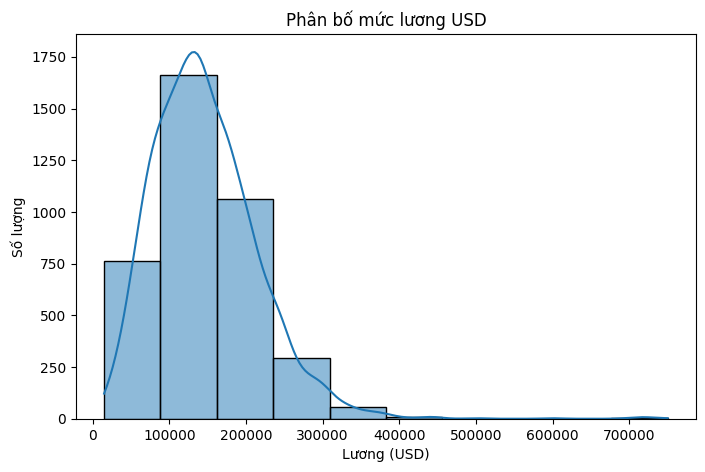

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['salary_in_usd'], bins=10, kde=True)
plt.title('Phân bố mức lương USD')
plt.xlabel('Lương (USD)')
plt.ylabel('Số lượng')
plt.show()

<h3>Nhận xét biểu đồ phân bố mức lương USD<h3>

Hình dạng phân bố:

- Biểu đồ lệch phải (skewed right): phần lớn mức lương tập trung ở mức thấp đến trung bình, nhưng vẫn có một số ít người có mức lương rất cao (đuôi dài về bên phải).

Mức lương phổ biến:

- Khoảng 100,000–150,000 USD là mức lương phổ biến nhất, có số người cao nhất (đỉnh histogram).

Lương cao ít xuất hiện:

- Từ 300,000 USD trở lên, số lượng người rất ít, cho thấy mức lương này là không phổ biến.

Giá trị ngoại lệ:

- Một số người có mức lương vượt 500,000 USD là outliers (ngoại lệ) — không ảnh hưởng nhiều đến xu hướng chung.

##**3.2. Mức lương trung bình theo chức danh**

<ipython-input-17-0e80e0c4a88d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='job_title', y='salary_in_usd', estimator='mean', ci=None)


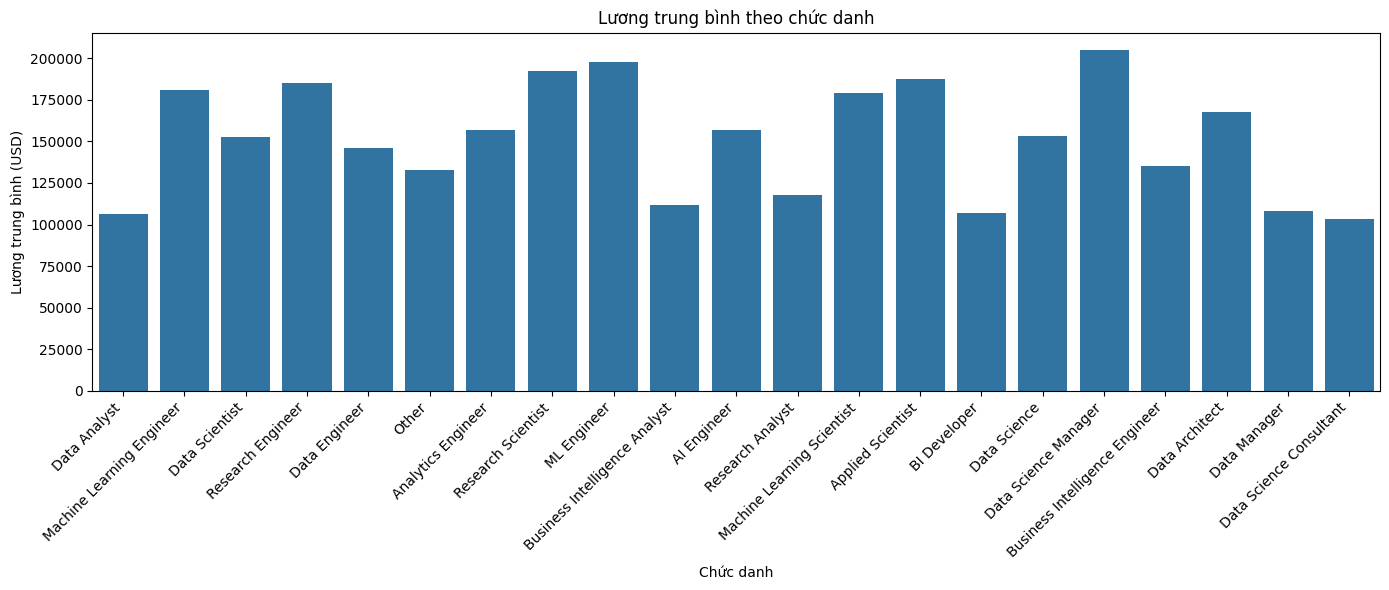

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(data=df, x='job_title', y='salary_in_usd', estimator='mean', ci=None)

plt.title('Lương trung bình theo chức danh')
plt.ylabel('Lương trung bình (USD)')
plt.xlabel('Chức danh')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h3>Nhận xét biểu đồ lương trung bình theo chức danh</h3>

Chức danh có lương cao nhất:

- Data Science Manager đứng đầu với mức lương trung bình trên 200,000 USD.

- Tiếp theo là ML Engineer, Research Scientist, BI Developer, Research Engineer với mức lương từ ~185,000–195,000 USD.

Nhóm có lương trung bình:

- Các vị trí như Machine Learning Engineer, Applied Scientist, AI Engineer, Data Scientist có lương dao động trong khoảng 150,000–180,000 USD.

Chức danh có lương thấp hơn:

- Các chức danh như Data Analyst, BI Developer, Business Intelligence Analyst, Data Manager, Data Science Consultant có mức lương trung bình dưới 120,000 USD.

Sự chênh lệch lương đáng kể:

- Có sự chênh lệch lớn giữa các chức danh — khoảng cách từ chức danh có lương thấp nhất đến cao nhất có thể lên tới gần 100,000 USD hoặc hơn.

##**3.3. Mức lương theo cấp độ kinh nghiệm**

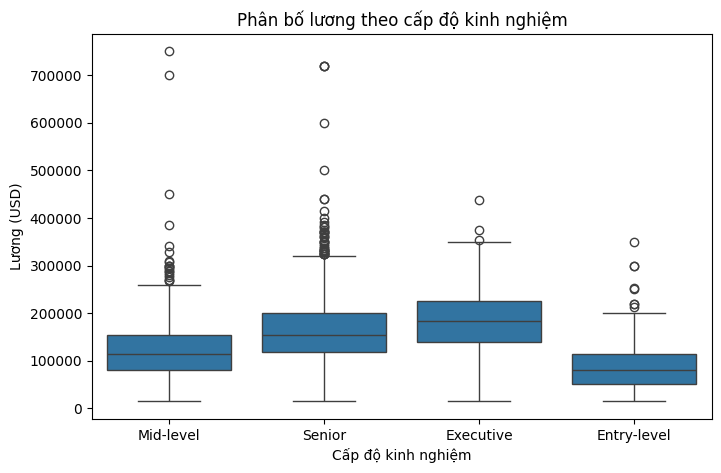

In [ ]:
exp_labels = {'EN': 'Entry-level', 'MI': 'Mid-level', 'SE': 'Senior', 'EX': 'Executive'}
df['exp_level'] = df['experience_level'].map(exp_labels)

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='exp_level', y='salary_in_usd')
plt.title('Phân bố lương theo cấp độ kinh nghiệm')
plt.xlabel('Cấp độ kinh nghiệm')
plt.ylabel('Lương (USD)')
plt.show()

<h3>Nhận xét tổng quan:</h3>
Lương tăng theo cấp độ kinh nghiệm (trừ một ngoại lệ nhỏ):

- Nhìn chung, mức lương trung vị (median) tăng dần từ Entry-level → Mid-level → Senior → Executive.

- Tuy nhiên, Executive có trung vị lương gần tương đương Senior, thậm chí có phần thấp hơn một chút trong biểu đồ này — điều này có thể do mẫu dữ liệu hoặc các ngành nghề cụ thể.

Entry-level có mức lương thấp nhất:

- Mức lương trung vị và biên dưới/thấp nhất của Entry-level rõ ràng thấp hơn đáng kể so với các nhóm khác.

Senior và Executive có độ phân tán lương cao:

- Cả hai nhóm này có nhiều outliers (các chấm nhỏ trên biểu đồ), cho thấy sự khác biệt lớn giữa các cá nhân trong cùng một cấp bậc — thường do ngành nghề, kỹ năng đặc thù, hoặc vị trí địa lý.

- Điều này phản ánh rằng cùng là Senior hay Executive, nhưng mức lương có thể dao động rất lớn.

Mid-level khá ổn định:

- Mức lương của Mid-level có vẻ ổn định hơn, với ít outliers hơn so với Senior và Executive.

##**3.4. Phân bố hình thức làm việc từ xa**

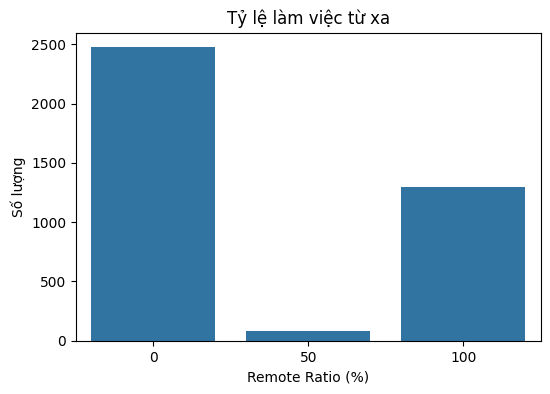

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='remote_ratio')
plt.title('Tỷ lệ làm việc từ xa')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Số lượng')
plt.show()

<h3>Nhận xét chi tiết:</h3>
Phần lớn làm việc tại văn phòng (0% remote):

- Nhóm này chiếm tỷ lệ cao nhất (~2.500 người), cho thấy nhiều công ty vẫn duy trì mô hình làm việc truyền thống.

- Có thể do tính chất công việc yêu cầu có mặt trực tiếp hoặc văn hóa doanh nghiệp chưa thích nghi với remote.

Số người làm việc hoàn toàn từ xa (100%) khá nhiều (~1.300):

- Đây là một con số đáng kể, cho thấy xu hướng làm việc từ xa đang được chấp nhận rộng rãi, đặc biệt có thể trong các ngành công nghệ, phần mềm, dữ liệu...

Làm việc kết hợp (50%) rất ít (~100):

- Điều này khá bất ngờ vì hybrid thường được xem là mô hình “lý tưởng” thời hậu COVID.

- Có thể do dữ liệu chưa phản ánh đầy đủ thực tế, hoặc do cách phân loại dữ liệu (ví dụ chỉ gộp 50%, không chia nhỏ hơn).

##**3.5. Top 10 quốc gia có lương trung bình cao nhất**

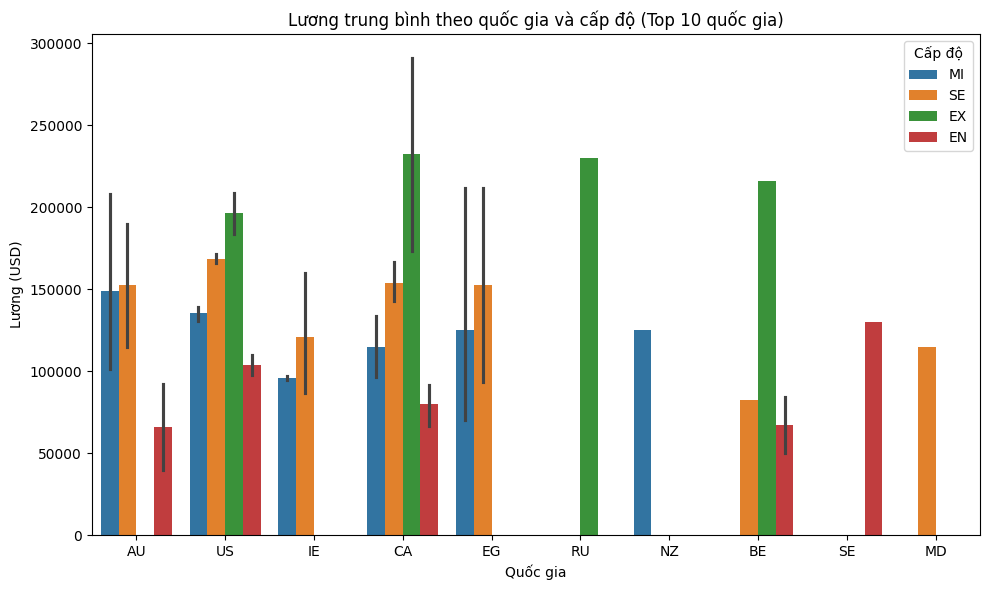

In [ ]:
mean_salary_by_country = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)

top_countries = mean_salary_by_country.head(10).index

top_df = df[df['employee_residence'].isin(top_countries)]

plt.figure(figsize=(10, 6))
sns.barplot(data=top_df, x='employee_residence', y='salary_in_usd', hue='experience_level', estimator='mean')

plt.title('Lương trung bình theo quốc gia và cấp độ (Top 10 quốc gia)')
plt.xlabel('Quốc gia')
plt.ylabel('Lương (USD)')
plt.legend(title='Cấp độ', loc='upper right')
plt.tight_layout()
plt.show()

<h3>Nhận xét chính:</h3>

Cấp độ Executive (EX) có mức lương cao nhất ở hầu hết quốc gia:

- Điều này đúng với kỳ vọng và rõ ràng trong các quốc gia như US, CA, EG, RU, BE.

- Một số quốc gia không có dữ liệu cho EX, ví dụ như SE (Thụy Điển) hoặc MD (Moldova), có thể do thiếu dữ liệu hoặc ít người ở cấp độ này.

Hoa Kỳ (US) và Canada (CA) có mức lương cao ở nhiều cấp độ:

- Lương ở cả bốn cấp độ tại US đều cao, đặc biệt là EX (~200,000 USD+).

- Canada cũng cho thấy mức chênh lệch rõ rệt giữa các cấp độ và có lương EX cao nhất trong biểu đồ (~230,000–290,000 USD).

Nga (RU) và Bỉ (BE) có mức lương Executive rất cao, nhưng không có dữ liệu cho các cấp độ khác:

- Nga (RU): Chỉ có dữ liệu cho EX (~230,000 USD).

- Điều này gây khó so sánh, nhưng gợi ý rằng chỉ người ở cấp cao tại các quốc gia này mới được ghi nhận trong dữ liệu.

Ai Cập (EG) và Ireland (IE) có sự khác biệt rõ rệt giữa các cấp độ:

- IE: Entry-level có mức lương thấp (~100k), nhưng Senior đã tăng lên ~120k.

- EG: Mid, Senior, và Executive đều có mặt, cho thấy cơ cấu dữ liệu đầy đủ hơn.

Moldova (MD) có lương Entry và Senior, nhưng không có Mid hay Executive:

- Điều này cho thấy thị trường lao động ở các quốc gia đang phát triển có thể thiếu các vị trí cấp cao hoặc dữ liệu chưa đầy đủ.

Thụy Điển (SE) có mức lương Entry-level cao bất ngờ (~130k):

- Đây là một điểm thú vị — mức lương Entry ở SE gần bằng hoặc vượt mức Mid/Senior của nhiều nước khác.

#**4. Xây dựng và đánh giá mô hình**


##**4.1. Linear Regression**


###**4.1.1. Import các thư viện sử dụng**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

###**4.1.2. Chuẩn hóa (StandardScaler)**


In [ ]:
def scale_features(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # Return as DataFrame with original index and columns
    return pd.DataFrame(X_scaled, columns=X.columns, index=X.index), scaler

###**4.1.3. Tách tập train/test**

In [ ]:
def split_data(X, y, test_size=0.2, seed=42):
    return train_test_split(X, y, test_size=test_size, random_state=seed)

###**4.1.4. Huấn luyện Linear Regression 10 lần**

In [ ]:
def train_linear_regression_n_times(X, y, n_runs=10):
    results = []

    for i in range(n_runs):
        X_train, X_test, y_train, y_test = split_data(X, y, seed=42 + i)

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        results.append({'run': i+1, 'mse': mse, 'rmse': rmse, 'r2': r2})

    return pd.DataFrame(results)

###**4.1.5. Gọi toàn bộ pipeline Linear Regression**

In [ ]:
X_raw, y = process_features(df)
X_scaled, scaler = scale_features(X_raw)

# Split data once for the subsequent model training blocks
X_train, X_test, y_train, y_test = split_data(X_scaled, y, seed=42)

lr_results = train_linear_regression_n_times(X_scaled, y, n_runs=10)

print(lr_results)
print("R² trung bình:", lr_results['r2'].mean())
print("R² cao nhất:", lr_results['r2'].max())

   run       mse      rmse        r2
0    1  0.137740  0.371134  0.438610
1    2  0.149390  0.386510  0.447178
2    3  0.135692  0.368364  0.467771
3    4  0.126257  0.355327  0.473729
4    5  0.138583  0.372268  0.477086
5    6  0.140473  0.374798  0.446549
6    7  0.142736  0.377804  0.449364
7    8  0.134753  0.367087  0.413018
8    9  0.152341  0.390309  0.444032
9   10  0.145730  0.381746  0.484208
R² trung bình: 0.4541544618095156
R² cao nhất: 0.48420784331696154


<h4>Nhận xét chính:</h4>

Tính ổn định cao:
- R² dao động từ khoảng 0.41 đến 0.48 → chứng tỏ mô hình Linear Regression sau khi scale + GridSearchCV có hiệu năng ổn định giữa các lần chia dữ liệu khác nhau.

Khả năng giải thích tương đối tốt:
- Với R² trung bình khoảng 0.454, mô hình giải thích được gần 45.4% phương sai trong biến mục tiêu salary_in_usd → không cao nhưng là một khởi đầu hợp lý cho một mô hình tuyến tính đơn giản.

Run tốt nhất (run 10):
- Có R² = 0.484, nghĩa là mô hình tốt nhất của bạn có thể giải thích gần 48.4% biến thiên trong lương từ các đặc trưng đầu vào.


###**4.1.6. Vẽ biểu đồ R² qua 10 lần chạy**

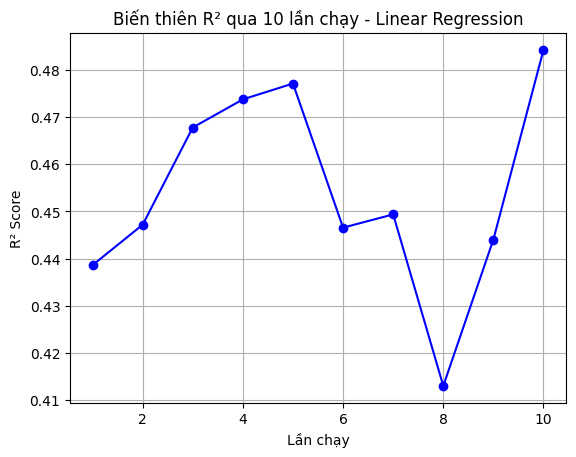

In [ ]:
plt.plot(lr_results['run'], lr_results['r2'], marker='o', color='blue')
plt.title('Biến thiên R² qua 10 lần chạy - Linear Regression')
plt.xlabel('Lần chạy')
plt.ylabel('R² Score')
plt.grid(True)
plt.show()

###**4.1.7. Thử cải thiện Linear Regression bằng GridSearchCV**

In [ ]:
r2_scores = []
mse_scores = []
best_models = []

param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

for i in range(10):
    # Chia dữ liệu
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Scale dữ liệu
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Khởi tạo GridSearchCV với Linear Regression
    grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)

    # Mô hình tốt nhất
    best_model = grid_search.best_estimator_
    best_models.append(best_model)

    # Dự đoán
    y_pred = best_model.predict(X_test_scaled)

    # Tính toán các metric
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"Lần chạy {i+1}:")
    print("  Best Params:", grid_search.best_params_)
    print("  MSE:", mse)
    print("  R2:", r2)
    print("-----------")

Lần chạy 1:
  Best Params: {'fit_intercept': True, 'positive': False}
  MSE: 0.13833323073841536
  R2: 0.4855685540491407
-----------
Lần chạy 2:
  Best Params: {'fit_intercept': True, 'positive': False}
  MSE: 0.12774578987109686
  R2: 0.46624508663081843
-----------
Lần chạy 3:
  Best Params: {'fit_intercept': True, 'positive': False}
  MSE: 0.14080115693357148
  R2: 0.47456874096674395
-----------
Lần chạy 4:
  Best Params: {'fit_intercept': True, 'positive': False}
  MSE: 0.1373196534323707
  R2: 0.4703865840529645
-----------
Lần chạy 5:
  Best Params: {'fit_intercept': True, 'positive': False}
  MSE: 0.14721606164955528
  R2: 0.444852355388081
-----------
Lần chạy 6:
  Best Params: {'fit_intercept': True, 'positive': False}
  MSE: 0.1289636840062833
  R2: 0.46439796528962884
-----------
Lần chạy 7:
  Best Params: {'fit_intercept': True, 'positive': False}
  MSE: 0.14672161870355108
  R2: 0.41154796350412415
-----------
Lần chạy 8:
  Best Params: {'fit_intercept': True, 'positive'

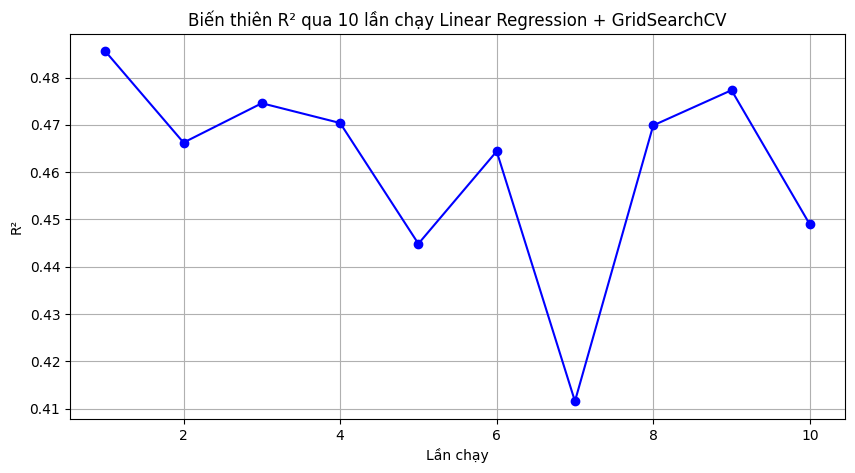

In [ ]:
#Vẽ biểu đồ R² của 10 lần chạy
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), r2_scores, marker='o', linestyle='-', color='blue')
plt.title('Biến thiên R² qua 10 lần chạy Linear Regression + GridSearchCV')
plt.xlabel('Lần chạy')
plt.ylabel('R²')
plt.grid(True)
plt.show()

In [ ]:
# Chọn mô hình tốt nhất (R² cao nhất)
best_index = np.argmax(r2_scores)
print("👉 Mô hình tốt nhất là lần chạy thứ", best_index+1)
print("  - R²:", r2_scores[best_index])
print("  - MSE:", mse_scores[best_index])
print("  - Tham số:", best_models[best_index].get_params())

👉 Mô hình tốt nhất là lần chạy thứ 1
  - R²: 0.4855685540491407
  - MSE: 0.13833323073841536
  - Tham số: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


<h4>Nhận xét:</h4>
Mặc dù có cải thiện, nhưng R² vẫn dưới 0.5, nghĩa là mô hình tuyến tính chưa giải thích tốt được phương sai của dữ liệu → mô hình underfitting.

##**4.2. Decision Tree**

###**4.2.1. Import các thư viện sử dụng**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

###**4.2.2. Scale và chia tập train/test**

In [ ]:
# 1. Xử lý features
X, y = process_features(df)

# 2. Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

###**4.2.3. Chạy 10 lần mô hình Decision Tree Regressor**

In [ ]:
results = []

for run in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=run)

    model = DecisionTreeRegressor(random_state=run)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({'run': run, 'mse': mse, 'rmse': rmse, 'r2': r2})


###**4.2.4. Tổng hợp kết quả và hiển thị**

In [ ]:
results_df = pd.DataFrame(results)
print(results_df)

print("\nR² trung bình:", results_df['r2'].mean())
print("R² cao nhất:", results_df['r2'].max())

   run       mse      rmse        r2
0    1  0.164926  0.406111  0.310895
1    2  0.162154  0.402683  0.394887
2    3  0.179211  0.423333  0.308821
3    4  0.189010  0.434753  0.287249
4    5  0.161389  0.401733  0.329731
5    6  0.168537  0.410532  0.324054
6    7  0.178461  0.422446  0.326926
7    8  0.161157  0.401444  0.367387
8    9  0.165032  0.406241  0.361332
9   10  0.196185  0.442928  0.313636

R² trung bình: 0.3324917166353785
R² cao nhất: 0.3948865721465066


<h3>Nhận xét chi tiết:</h3>
Độ chính xác (R²):
- R² cao nhất đạt ~0.3949, thấp nhất khoảng ~0.2872, trung bình ~0.33.

- Điều này cho thấy mô hình Decision Tree giải thích được khoảng 33% phương sai trong dữ liệu, tức là chưa thực sự mạnh cho bài toán dự đoán lương hiện tại.

- So với Linear Regression làm trước (R² ~0.45–0.48), thì Decision Tree hoạt động kém hơn trong bài toán này.

Mức độ biến thiên giữa các lần chạy:

- R² dao động trong khoảng 0.28–0.39 ⇒ có biến thiên nhưng không quá lớn.

- Điều này cho thấy mô hình khá ổn định, nhưng chưa mạnh về hiệu suất.

Sai số RMSE (Root Mean Squared Error):
- Các giá trị RMSE khoảng 0.40–0.44, phản ánh sai số dự đoán trung bình của mô hình sau khi đã log-transform lương (log1p).

- Trong thực tế, điều này vẫn có thể dẫn đến sai số lớn khi quay ngược lại giá trị lương thực

###**4.2.5. Vẽ biểu đồ R² theo từng lần chạy**


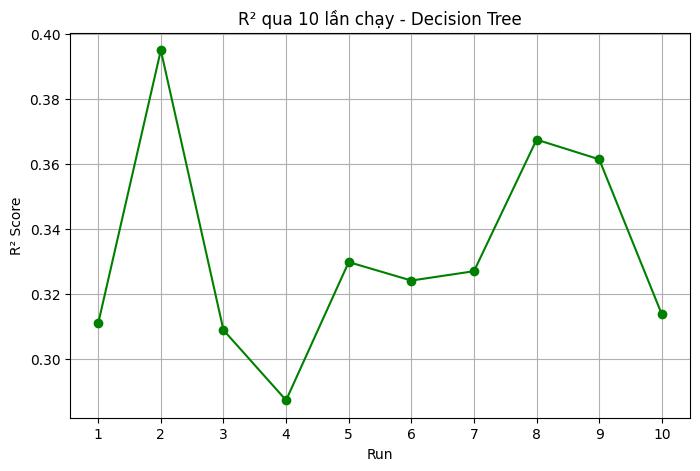

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(results_df['run'], results_df['r2'], marker='o', linestyle='-', color='green')
plt.title('R² qua 10 lần chạy - Decision Tree')
plt.xlabel('Run')
plt.ylabel('R² Score')
plt.grid(True)
plt.xticks(range(1,11))
plt.show()

##**4.3. Random Forest**

###**4.3.1. Import các thư viện sử dụng**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

###**4.3.2. Scale dữ liệu**

In [ ]:
# Giả sử bạn đã có DataFrame df gốc
X, y = process_features(df)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

###**4.3.3. Train/Test Split và chạy mô hình Random Forest 10 lần**

In [ ]:
results_rf = []

for run in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=run)

    model = RandomForestRegressor(random_state=run, n_estimators=100, max_depth=None)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results_rf.append({'run': run, 'mse': mse, 'rmse': rmse, 'r2': r2})


In [ ]:
df_results_rf = pd.DataFrame(results_rf)
print(df_results_rf)

print(f"\nR² trung bình: {df_results_rf['r2'].mean()}")
print(f"R² cao nhất: {df_results_rf['r2'].max()}")

   run       mse      rmse        r2
0    1  0.141839  0.376616  0.407358
1    2  0.153330  0.391574  0.427815
2    3  0.157630  0.397026  0.392054
3    4  0.161884  0.402348  0.389540
4    5  0.134694  0.367007  0.440600
5    6  0.152150  0.390064  0.389776
6    7  0.153276  0.391505  0.421911
7    8  0.145195  0.381045  0.430044
8    9  0.144651  0.380330  0.440205
9   10  0.168744  0.410785  0.409640

R² trung bình: 0.41489417121245803
R² cao nhất: 0.44059950883394705


<h3>Nhận xét:</h3>

- Random Forest là lựa chọn tốt hơn cho bài toán này.

- Mô hình thể hiện tính ổn định cao: sự biến thiên giữa các lần chạy nhỏ.

- Tuy chưa đạt R² > 0.5, nhưng ở mức 0.44 là chấp nhận được nếu dữ liệu thực tế có nhiễu và nhiều biến phân loại.

###**4.3.4. Vẽ biểu đồ R² qua 10 lần chạy**

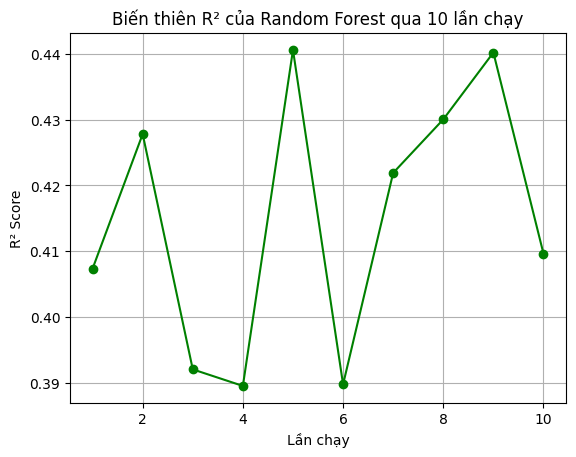

In [ ]:
plt.plot(df_results_rf['run'], df_results_rf['r2'], marker='o', color='green')
plt.title("Biến thiên R² của Random Forest qua 10 lần chạy")
plt.xlabel("Lần chạy")
plt.ylabel("R² Score")
plt.grid(True)
plt.show()

##**4.4. XGBoost**

###**4.4.1. Import các thư viện sử dụng**


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

###**4.4.2. Chạy mô hình XGBoost 10 lần**


In [ ]:
from sklearn.model_selection import train_test_split

results = []

for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=i
    )

    model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'run': i,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    })

results_df = pd.DataFrame(results)

print(results_df)
print("\nR² trung bình:", results_df['r2'].mean())
print("R² cao nhất:", results_df['r2'].max())


   run       mse      rmse        r2
0    1  0.135665  0.368328  0.433155
1    2  0.140285  0.374546  0.476495
2    3  0.142363  0.377311  0.450934
3    4  0.150517  0.387966  0.432403
4    5  0.129834  0.360324  0.460785
5    6  0.140862  0.375316  0.435049
6    7  0.138480  0.372129  0.477715
7    8  0.133263  0.365052  0.476883
8    9  0.134265  0.366421  0.480400
9   10  0.151018  0.388611  0.471654

R² trung bình: 0.4595471010113673
R² cao nhất: 0.48040024947591065


<h3>Nhận xét:</h3>

- Mô hình XGBoost đạt R² cao nhất (0.480) trong tất cả các mô hình bạn đã thử (Linear Regression, Decision Tree, Random Forest).

- R² score khá ổn định, dao động trong khoảng từ 0.43 đến 0.48 → cho thấy mô hình học tốt và nhất quán khi thay đổi dữ liệu train/test.

- RMSE nhỏ (~0.36–0.39) → dự đoán khá sát so với thực tế (dữ liệu đã được log transform).

###**4.4.3. Vẽ biểu đồ R² qua 10 lần chạy**

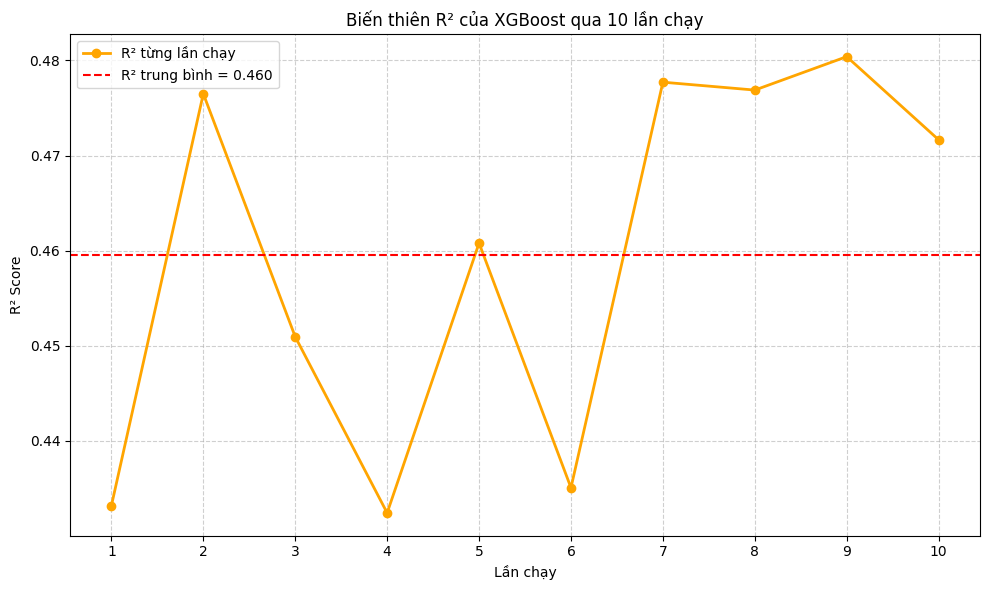

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['run'], results_df['r2'], marker='o', color='orange', linewidth=2, label='R² từng lần chạy')
plt.axhline(y=results_df['r2'].mean(), color='red', linestyle='--', label=f'R² trung bình = {results_df["r2"].mean():.3f}')
plt.title("Biến thiên R² của XGBoost qua 10 lần chạy")
plt.xlabel("Lần chạy")
plt.ylabel("R² Score")
plt.xticks(results_df['run'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

##**4.5. K-Nearest Neighbors Regressor (KNN)**

###**4.5.1. Import các thư viện sử dụng**


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

###**4.5.2. Chạy mô hình KNN 10 lần**


In [ ]:
results_knn = []

for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=i
    )

    model = KNeighborsRegressor(n_neighbors=5)  # Bạn có thể điều chỉnh k nếu muốn
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results_knn.append({
        'run': i,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    })

df_results_knn = pd.DataFrame(results_knn)

print(df_results_knn)
print("\nR² trung bình:", df_results_knn['r2'].mean())
print("R² cao nhất:", df_results_knn['r2'].max())

   run       mse      rmse        r2
0    1  0.163580  0.404450  0.316523
1    2  0.189680  0.435523  0.292166
2    3  0.172246  0.415025  0.335685
3    4  0.186782  0.432183  0.295649
4    5  0.154316  0.392831  0.359106
5    6  0.186306  0.431632  0.252788
6    7  0.186939  0.432365  0.294948
7    8  0.168110  0.410013  0.340092
8    9  0.170118  0.412453  0.341649
9   10  0.196099  0.442831  0.313937

R² trung bình: 0.31425409614020366
R² cao nhất: 0.35910603854679257


<h3>Nhận xét:</h3>

Hiệu suất thấp hơn các mô hình khác:

- R² trung bình của KNN thấp hơn rõ rệt so với:
<ul>
  <li>Random Forest: ~0.415</li>
  <li>XGBoost: ~0.460</li>
</ul>

- Điều này cho thấy KNN không phù hợp lắm với bài toán này, ít nhất là với các tham số mặc định (k=5).

Biến động lớn giữa các lần chạy:

- R² dao động từ khoảng 0.252 đến 0.359.

- Điều này cho thấy mô hình kém ổn định, khá nhạy với cách chia dữ liệu train/test.

Có thể do đặc trưng của dữ liệu:

- KNN hoạt động kém nếu dữ liệu có:
<ul>
  <li>Nhiều chiều (nhiều biến sau one-hot)</li>
  <li>Khoảng cách không phản ánh độ tương đồng thực tế (vấn đề với metric mặc định Euclidean).</li>
</ul>

- Thêm vào đó, chuẩn hóa dữ liệu là rất quan trọng với KNN. Nếu chưa dùng StandardScaler, bạn nên thử.

###**4.5.3. Vẽ biểu đồ R² theo từng lần chạy**


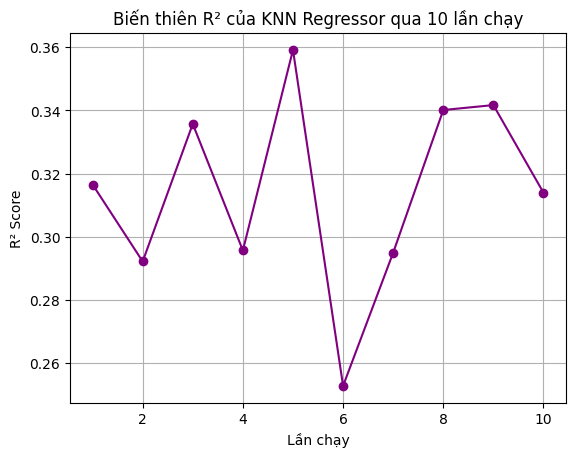

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_results_knn['run'], df_results_knn['r2'], marker='o', color='purple')
plt.title("Biến thiên R² của KNN Regressor qua 10 lần chạy")
plt.xlabel("Lần chạy")
plt.ylabel("R² Score")
plt.grid(True)
plt.show()

#**5. Vẽ biểu đồ so sánh:**


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
import time

##**5.1. Biểu đồ so sánh Mean Squared Error (MSE)**

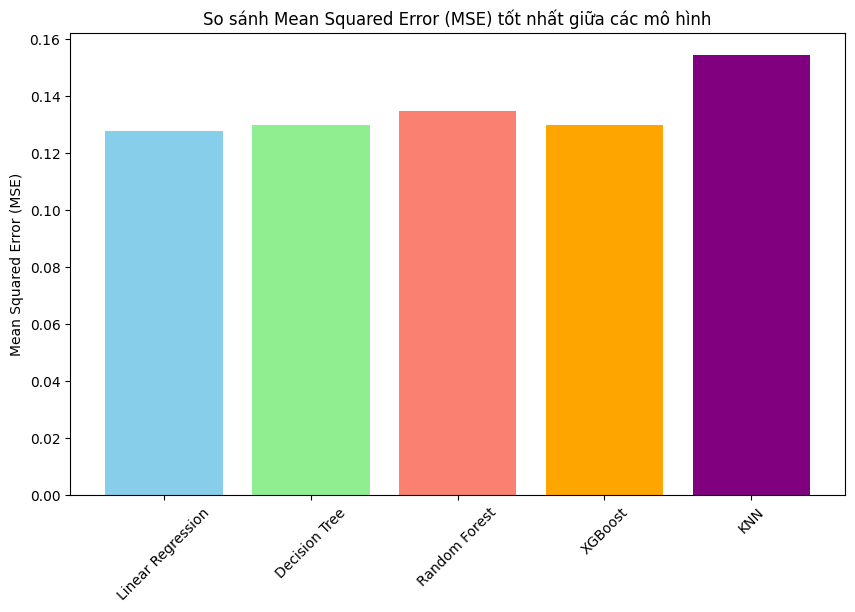

In [ ]:
best_mse_lr = min(mse_scores)

best_mse_dt = results_df['mse'].min()

best_mse_rf = df_results_rf['mse'].min()

best_mse_xgb = results_df['mse'].min()

best_mse_knn = df_results_knn['mse'].min()

models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNN']
best_mse_values = [best_mse_lr, best_mse_dt, best_mse_rf, best_mse_xgb, best_mse_knn]

x_pos = np.arange(len(models))

plt.figure(figsize=(10,6))
plt.bar(x_pos, best_mse_values, color=['skyblue', 'lightgreen', 'salmon', 'orange', 'purple']) # Using different colors for clarity
plt.xticks(x_pos, models, rotation=45)
plt.ylabel('Mean Squared Error (MSE)')
plt.title('So sánh Mean Squared Error (MSE) tốt nhất giữa các mô hình')
plt.show()

###2. Biểu đồ so sánh Root Mean Squared Error (RMSE)

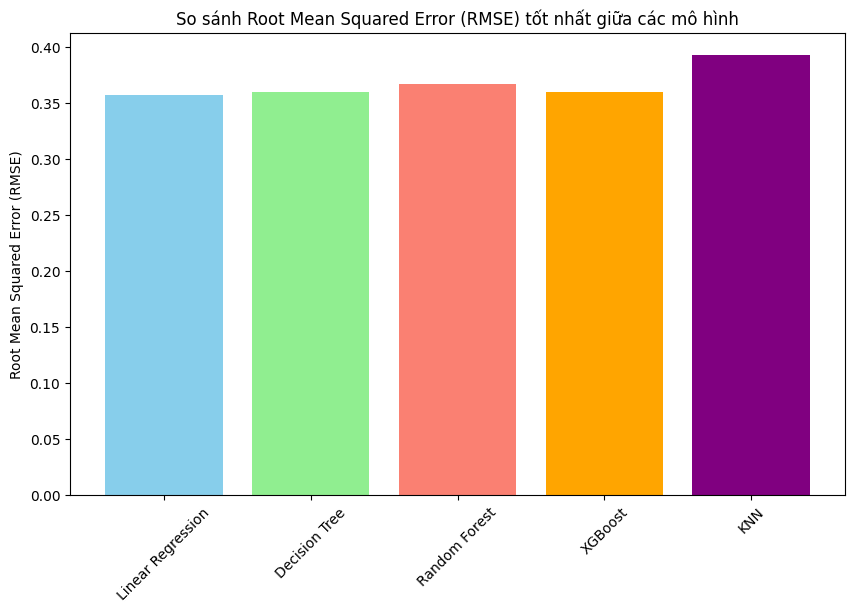

In [ ]:
best_rmse_lr = np.sqrt(best_mse_lr)
best_rmse_dt = results_df['rmse'].min()
best_rmse_rf = df_results_rf['rmse'].min()
best_rmse_xgb = results_df['rmse'].min()
best_rmse_knn = df_results_knn['rmse'].min()

models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNN']
best_rmse_values = [best_rmse_lr, best_rmse_dt, best_rmse_rf, best_rmse_xgb, best_rmse_knn]

x_pos = np.arange(len(models))

plt.figure(figsize=(10,6))
plt.bar(x_pos, best_rmse_values, color=['skyblue', 'lightgreen', 'salmon', 'orange', 'purple']) # Sử dụng màu tương tự
plt.xticks(x_pos, models, rotation=45)
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('So sánh Root Mean Squared Error (RMSE) tốt nhất giữa các mô hình')
plt.show()

###3. Biểu đồ so sánh R-squared (R²)

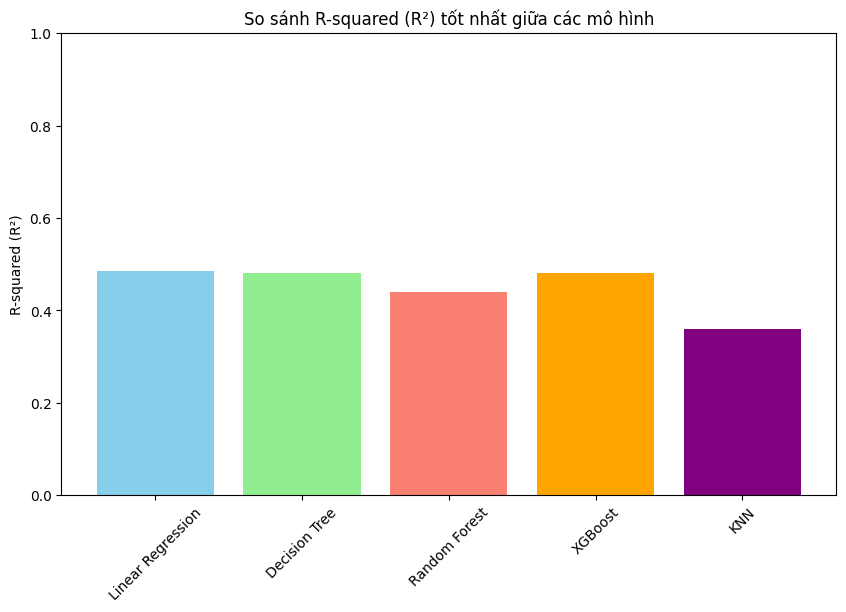

In [ ]:
best_r2_lr = max(r2_scores)

best_r2_dt = results_df['r2'].max()

best_r2_rf = df_results_rf['r2'].max()

best_r2_xgb = results_df['r2'].max()

best_r2_knn = df_results_knn['r2'].max()

models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNN']
best_r2_values = [best_r2_lr, best_r2_dt, best_r2_rf, best_r2_xgb, best_r2_knn]

x_pos = np.arange(len(models))

plt.figure(figsize=(10,6))
plt.bar(x_pos, best_r2_values, color=['skyblue', 'lightgreen', 'salmon', 'orange', 'purple'])
plt.xticks(x_pos, models, rotation=45)
plt.ylabel('R-squared (R²)')
plt.title('So sánh R-squared (R²) tốt nhất giữa các mô hình')
plt.ylim(0, 1)
plt.show()

###4. Biểu đồ so sánh MAE

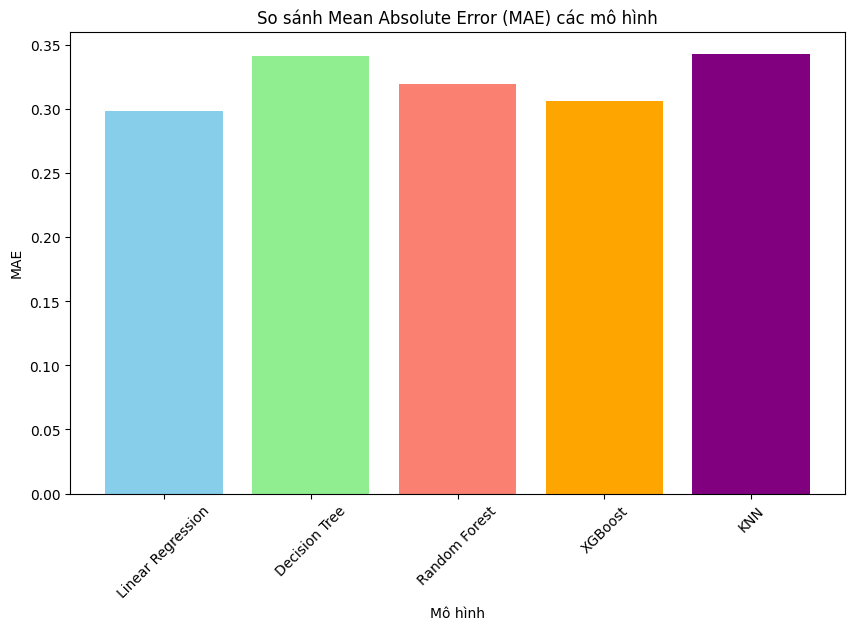

In [ ]:
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNN']
mae_values = [mae_lr, mae_dt, mae_rf, mae_xgb, mae_knn]

plt.figure(figsize=(10,6))
plt.bar(models, mae_values, color=['skyblue', 'lightgreen', 'salmon', 'orange', 'purple'])
plt.title('So sánh Mean Absolute Error (MAE) các mô hình')
plt.ylabel('MAE')
plt.xlabel('Mô hình')
plt.xticks(rotation=45)
plt.show()

###5. Biểu đồ so sánh Training Time

Thời gian huấn luyện Linear Regression: 0.0368 giây
Thời gian huấn luyện Decision Tree: 0.0283 giây
Thời gian huấn luyện Random Forest: 1.0347 giây
Thời gian huấn luyện XGBoost: 0.2103 giây
Thời gian huấn luyện KNN: 0.0058 giây


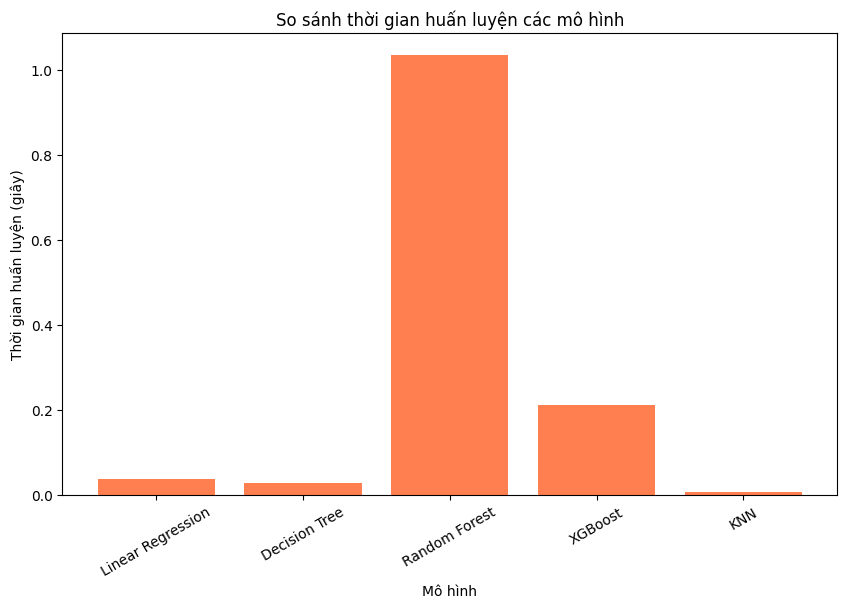

In [ ]:
training_times = []
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNN'] # Thêm SVR nếu đã thử

lr_model = LinearRegression()
start = time.time()
lr_model.fit(X_train, y_train)
end = time.time()
training_times.append(end - start)
print(f"Thời gian huấn luyện Linear Regression: {end - start:.4f} giây")

dt_model = DecisionTreeRegressor(random_state=42)
start = time.time()
dt_model.fit(X_train, y_train)
end = time.time()
training_times.append(end - start)
print(f"Thời gian huấn luyện Decision Tree: {end - start:.4f} giây")

rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
start = time.time()
rf_model.fit(X_train, y_train)
end = time.time()
training_times.append(end - start)
print(f"Thời gian huấn luyện Random Forest: {end - start:.4f} giây")

xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
start = time.time()

xgb_model.fit(X_train, y_train)
end = time.time()
training_times.append(end - start)
print(f"Thời gian huấn luyện XGBoost: {end - start:.4f} giây")

knn_model = KNeighborsRegressor(n_neighbors=5)
start = time.time()
knn_model.fit(X_train, y_train)
end = time.time()
training_times.append(end - start)
print(f"Thời gian huấn luyện KNN: {end - start:.4f} giây")

plt.figure(figsize=(10,6))
plt.bar(models, training_times, color='coral')
plt.title('So sánh thời gian huấn luyện các mô hình')
plt.ylabel('Thời gian huấn luyện (giây)')
plt.xlabel('Mô hình')
plt.xticks(rotation=30)
plt.show()